# GRIP #Nov2021

**Author : Janvi Nandre**

**Task2 : Decision Tree Classifier**

**Level : Intermediate**

**Language : Python**

**Environment : Google Collab Notebook**

**Task description** : Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

**Dataset** : https://bit.ly/3kXTdox

In [34]:
# import required libraries

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

##Data Preparation

In [35]:
# load the dataset

iris = datasets.load_iris()
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [36]:
data['Species']=iris['target']

In [37]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [38]:
# print first 5 rows

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
# print number of rows and columns

data.shape

(150, 5)

##Data visualization

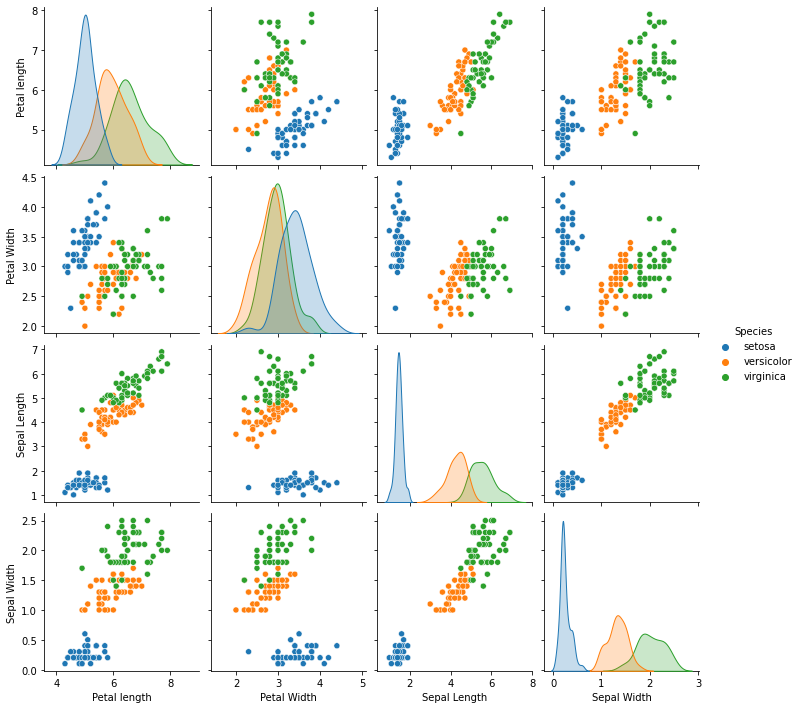

In [40]:
sns.pairplot(data, hue = 'Species')
plt.show()

[]

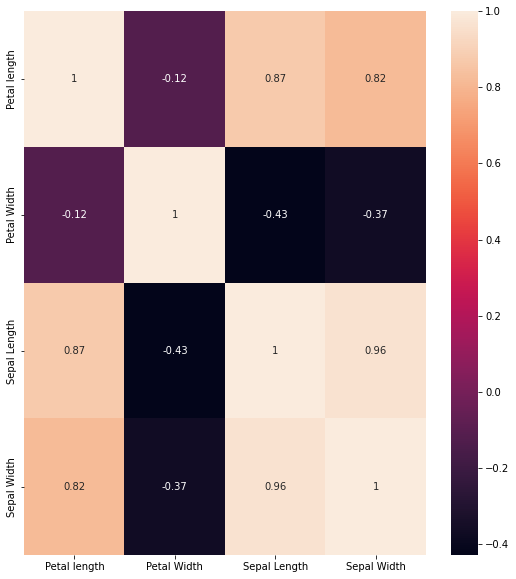

In [41]:
# correlation using heatmap

plt.figure(figsize=(9,10))
sns.heatmap(data.corr(),annot=True)
plt.plot()

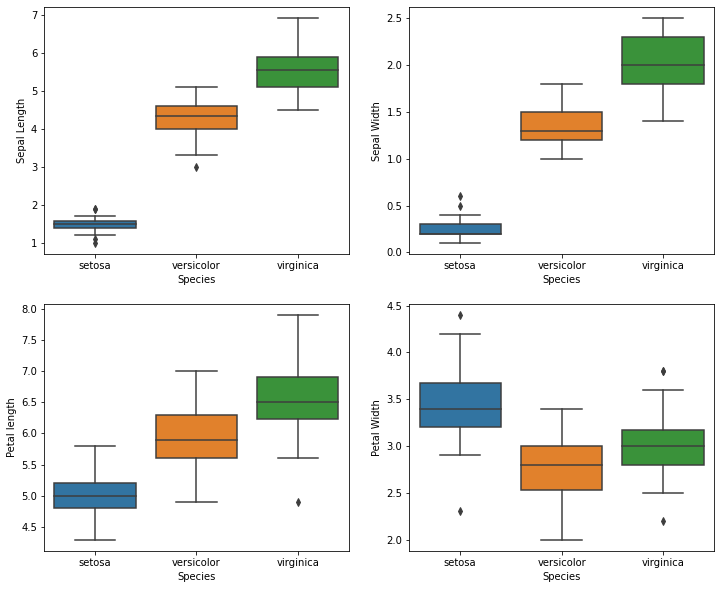

In [42]:
# boxplot to compare feature with species

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

In [43]:
# prepare data in form of test and train dataset

from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [44]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [45]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

##Decision Tree Classifier Model

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=12)

# train our model
model = DTC.fit(train_X, train_y)

In [47]:
# Prediction on testing set

DTC.predict(test_X)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica'], dtype=object)

##Model Evaluation

In [48]:
DTC.score(test_X, test_y)

0.9777777777777777

In [49]:
#prediction
y_pred = DTC.predict(test_X)

In [50]:
#Get model accuracy
from sklearn import metrics
print('Accuracy Score :', metrics.accuracy_score(test_y, y_pred))

Accuracy Score : 0.9777777777777777


## Decision Tree Visualization

In [51]:
!pip install pydotplus

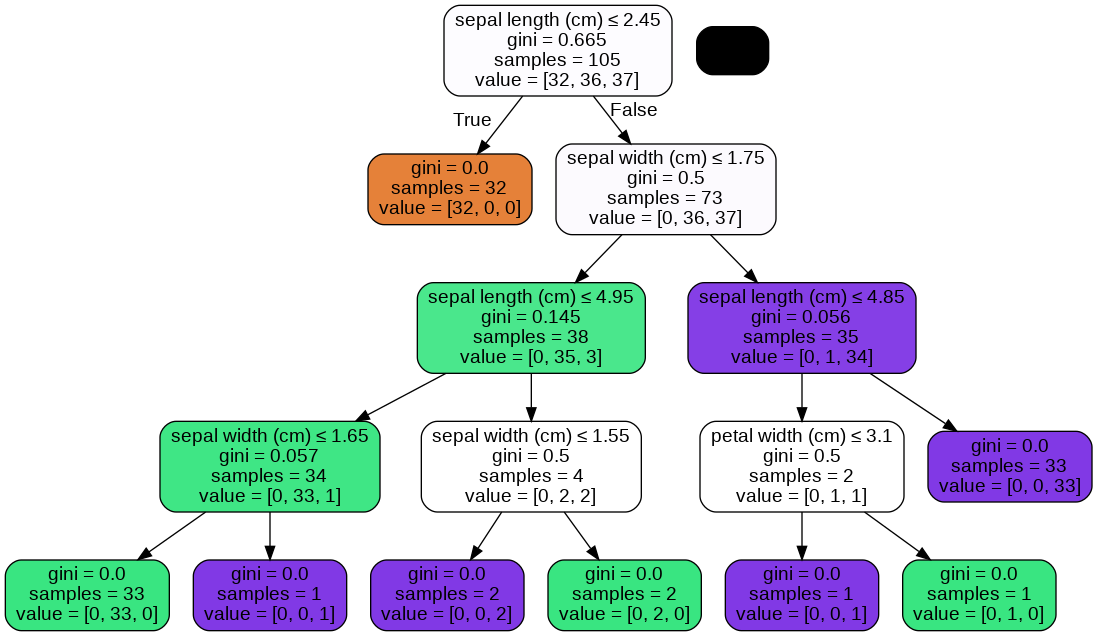

In [52]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the tree 
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
# prediction classes using our model

DTC.predict([[3.5, 1.9, 5.2, 2.4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['virginica'], dtype=object)

In [54]:
DTC.predict([[4.6, 2.9, 3.6, 5.9]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['versicolor'], dtype=object)